In [20]:
using PyPlot
plt = PyPlot
using LaTeXStrings

In [21]:
# Variables
Ns     = 20:5:130
sigmas = 0.0:0.05:2.0
Qfs   = 1:2:100 

stochastic_mean = zeros(size(sigmas, 1), size(Ns, 1))
deterministic_mean = zeros(size(Qfs, 1), size(Ns, 1))

50×23 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [22]:
files = readdir("results")

2394-element Array{String,1}:
 "deterministic-10.csv"   
 "deterministic-11.csv"   
 "deterministic-12.csv"   
 "deterministic-13.csv"   
 "deterministic-1.csv"    
 "deterministic-2.csv"    
 "deterministic-3.csv"    
 "deterministic-4.csv"    
 "deterministic-5.csv"    
 "deterministic-6.csv"    
 "deterministic-7.csv"    
 "deterministic-8.csv"    
 "deterministic-9.csv"    
 ⋮                        
 "stochastic-rio-4-33.csv"
 "stochastic-rio-4-34.csv"
 "stochastic-rio-4-35.csv"
 "stochastic-rio-4-36.csv"
 "stochastic-rio-4-37.csv"
 "stochastic-rio-4-3.csv" 
 "stochastic-rio-4-4.csv" 
 "stochastic-rio-4-5.csv" 
 "stochastic-rio-4-6.csv" 
 "stochastic-rio-4-7.csv" 
 "stochastic-rio-4-8.csv" 
 "stochastic-rio-4-9.csv" 

In [23]:
d = 0
s = 0
for i=1:length(files)
    if startswith(files[i], "deterministic")
        d += 1
        deterministic_mean += readcsv(string("results/", files[i]))
    elseif startswith(files[i], "stochastic")
        s += 1
        stochastic_mean += readcsv(string("results/", files[i]))
    end
end
print(d)
print("\n")
print(s)

stochastic_mean = stochastic_mean/s
deterministic_mean = deterministic_mean/d

1186
1208

50×23 Array{Float64,2}:
 2.63953e7  4.3536e5   10882.8        …   0.0198659   0.0171962   0.0158799
 7.46252e8  3.97143e5   5540.86          -0.141336   -0.14347    -0.144769 
 5.10043e7  2.10034e5   7679.12          -0.301643   -0.302987   -0.303935 
 2.31141e8  1.16828e5   8410.58          -0.383071   -0.385104   -0.38594  
 1.15091e9  1.98739e5      1.85718e6     -0.435788   -0.43658    -0.437721 
 3.09914e7  3.19803e5   4965.08       …  -0.339234   -0.351792   -0.363151 
 5.20924e7  5.00618e5  11459.5           -0.266054   -0.280231   -0.292519 
 8.1514e8   1.80875e6   9025.97          -0.231791   -0.24586    -0.255973 
 9.16966e8  6.73012e7      1.62711e5     -0.211105   -0.223726   -0.236347 
 2.15378e8  1.62619e6  10561.6           -0.198359   -0.207837   -0.221034 
 7.68862e7  2.82525e5  15149.5        …  -0.186327   -0.198045   -0.206444 
 9.63029e7  2.99072e5  16979.0           -0.17455    -0.186576   -0.194872 
 6.69704e7  1.03029e6  14907.9           -0.162919   -0.176062  

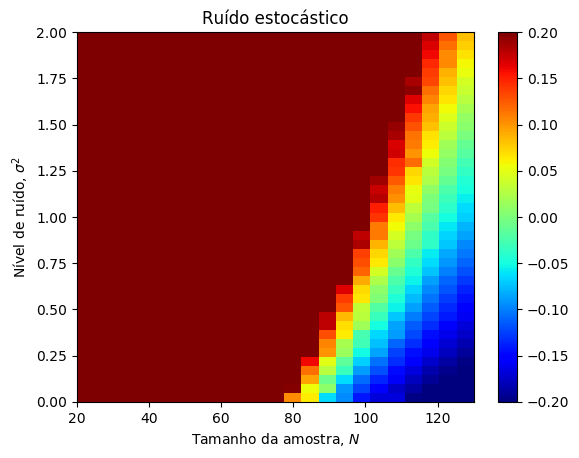

In [26]:

plt.imshow(stochastic_mean, cmap="jet", origin="lower", vmin=-0.2, vmax=0.2, extent=[20,130,0.0,2.0], aspect="auto")
plt.colorbar()
plt.title("Ruído estocástico")
plt.xlabel(L"Tamanho da amostra, $N$")
plt.ylabel(L"Nível de ruído, $\sigma^2$")
plt.show()
plt.savefig("stochastic.eps", format="eps")

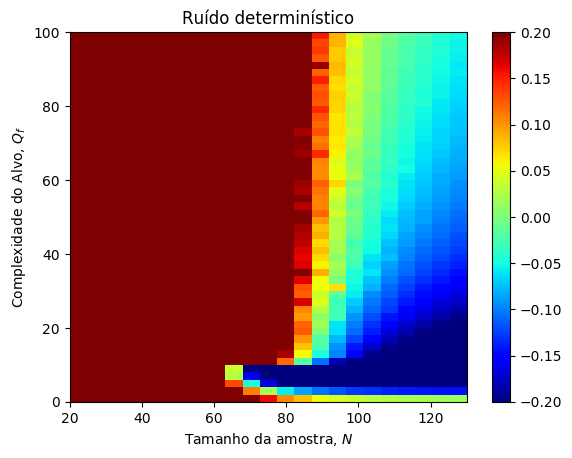

In [27]:

plt.imshow(deterministic_mean, cmap="jet", origin="lower", vmin=-0.2, vmax=0.2, extent=[20,130,0,100], aspect="auto")
plt.colorbar()
plt.title("Ruído determinístico")
plt.xlabel(L"Tamanho da amostra, $N$")
plt.ylabel(L"Complexidade do Alvo, $Q_f$")
plt.show()
plt.savefig("deterministic.eps", format="eps")